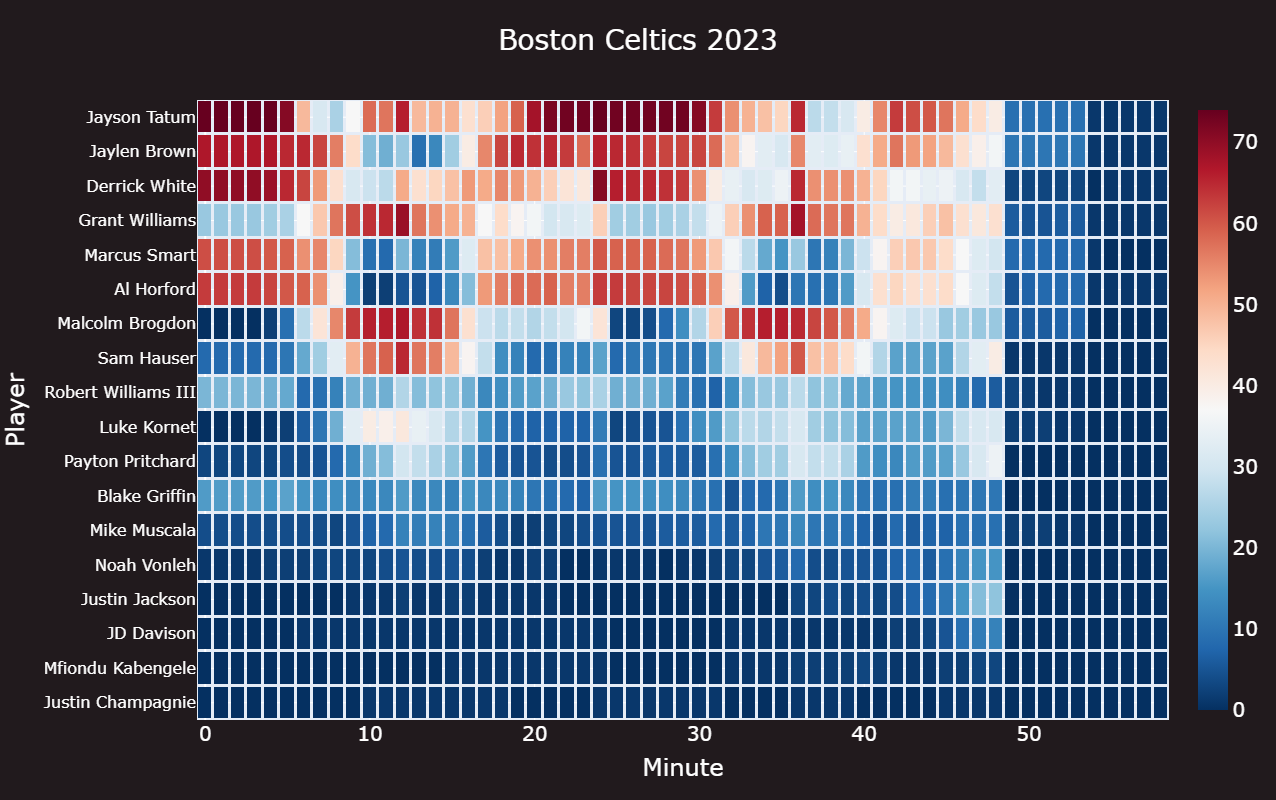

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from nba_api.stats.static import players,teams
import plotly.graph_objects as go

# Define the data
def graph_rotation(team,year):
    team = team.upper()
    df = pd.read_csv('rotations/'+str(year)+'.csv')
    nba_teams = teams.get_teams()
    team_list= {}
    full_name = {}
    for org in nba_teams:
        team_list[org['abbreviation']] = org['id']
        full_name[org['abbreviation']] = org['full_name']
    title = full_name[team]+ ' '+str(year)
    


    team_id = team_list[team]
    # Convert the times to seconds
    df['start'] = df['IN_TIME_REAL']
    df['end'] = df['OUT_TIME_REAL']
    df['Player'] = df['PLAYER_FIRST']+' '+df['PLAYER_LAST'].str.split('-').str[0]
    df['start'] /=600
    df['end']/=600

    #df = df.sort_values(by=['0'])
    df = df[df.TEAM_ID==team_id]
    df =df.drop_duplicates()

    players = df['Player'].unique()

    # Identify the maximum end time to determine the total duration
    max_end_minute = round(df['end'].max())

    # Create an empty matrix to represent player minutes played
    minutes_played_matrix=  pd.DataFrame(index=players, columns=[i for i in range(max_end_minute + 1)], data=0)

    plus_minus_matrix=  pd.DataFrame(index=players, columns=[i for i in range(max_end_minute + 1)], data=0)

    # Increment the matrix based on player on-court times
    for _, row in df.iterrows():
        player = row['Player']
        start_minute = row['start']
        end_minute = row['end']
        plus_minus = row['PT_DIFF']

        minutes_played_matrix.loc[player, start_minute:end_minute] += 1
        plus_minus_matrix.loc[player, start_minute:end_minute] += plus_minus
    #minutes_played_matrix = minutes_played_matrix[[i for i in range(0,49)]]
    #plus_minus_matrix = plus_minus_matrix[[i for i in range(0,49)]]
    test_matrix=plus_minus_matrix / minutes_played_matrix
    

    
    
    #print(test_matrix.sum())
    team_plus = plus_minus_matrix.sum(axis=0) / minutes_played_matrix.sum(axis=0)
    #print(team_plus.sum())

    #print(team_plus)
    minutes_played_matrix['total']= minutes_played_matrix.iloc[:].sum(axis=1)
    minutes_played_matrix.sort_values(by='total',inplace=True,ascending=True)
    minutes_played_matrix.drop(columns='total',inplace=True)
    #print(plus_minus_matrix.iloc[0].sum())

    # Create the heatmap
    #minutes_played_matrix.sort_index(axis=22,inplace=True)

    fig = go.Figure(data=go.Heatmap(z=minutes_played_matrix.values,
                                    x=minutes_played_matrix.columns,
                                    y=minutes_played_matrix.index,
                                    xgap=3,
                                    ygap=3,
                                    type='heatmap',
                                    colorscale='RdBu_r'))
    fig.update_yaxes(tickfont=dict(color='white',size = 16))

    # Customize the layout
    fig.update_layout(title=title,
                      title_x=.5,
                          #plot_bgcolor='#211a1d',
                          paper_bgcolor='#211a1d',

                      width=1200,
                      height=800,
                      font=dict(color='white',size = 20),
                      xaxis_title='Minute',
                      yaxis_title='Player')

    # Show the plot
    return fig
fig = graph_rotation('bos',2023)
fig.show()



In [ ]:
import plotly.graph_objs as go

def broken_bars(xstart, xwidth, ystart, yh, colors):
    #xstart - list of x-start coord for each bar
    #xwidth = list of bar widths
    #ystart - number y-start coord for each bar
    #yh - number- height of eah bar
    #colors = list of bar colors
    
    if len(xstart) != len(xwidth) or  len(xstart) != len(colors):
        raise ValueError('xstart, xwidth and colors must have the same length')
    shapes = []    
    for k in range(len(xstart)):
        shapes.append(dict(type="rect",
                           x0=xstart[k],
                           y0=ystart,
                           x1=xstart[k] + xwidth[k],
                           y1=ystart+yh,
                           fillcolor=colors[k],
                           line_color=colors[k]))
    return shapes    
# taken from https://community.plotly.com/t/broken-barh-plot/36496/2
fig = go.Figure()
fig.update_layout(width=1000, height=625,
                  xaxis_range = [xmin,xmax],
                  yaxis_range = [0,len(players)],
                  shapes=broken_bars([10, 100, 130 ], [50, 20, 10], 20, 9, 
                                     colors=['orange', 'green', 'red' ]))

In [ ]:
raw_game = f'https://cdn.nba.com/static/json/liveData/playbyplay/playbyplay_{game_id}.json'
page = requests.get(raw_game)
j = json.loads(page.content)
df = pd.DataFrame(j['game']['actions'])

In [ ]:
x_max = df['end'].max()

In [ ]:
x_max

In [ ]:
import plotly.figure_factory as ff
df['Task'] = df['fullname']
df['Start'] = df['start']
df['Finish'] = df['end']
fig = ff.create_gantt(df)
fig.show()

In [ ]:
df.columns